Stock Backtesting is way of testing our strategy in a historical data to see if our strategy makes any money or not. Let's start with a simple story. 

John and Joe are two best friends. They both earned some money from their hard working corporate job and wanted to invest it in a stock market. Unlike Joe, John is clever and does not fall for any influence of stock's price increasing and decreasing. They studied some Statistics and Probability along with Economics in college and and they love their money. Joe followed trend and bought some stock of X and felt glad that his stock's price increased by some % in few days. John was calm person and thought that John's stock position is increased but he is not earning any money and only way to earn is by selling it. John wanted to get back in time and questioned himself what will happen if I try to buy some stock of X and sell it if price increased by 10% or decrease by 5%. Then I will buy as much stock as possible from the amount I have. How much would have I earned today? Well he did not know but what he tried to do is a simple stock backtesting example.

Here in this blog, we will start with our very simple strategy and then try to use of the most popular stock backtesting Python package [`Backtesting.py`](https://kernc.github.io/backtesting.py/doc/backtesting/#manuals). But first, let's install it. 

In [1]:
!pip install backtesting

Before going into backtesting, lets choose the data of any stock. We will choose data of AAPL from `yfinance`. If it is not installed, we can do so by `pip install yfinance`.

In [2]:
!pip install yfinance --user

In [3]:
import pandas as pd
import yfinance as yf

Next is to download data. We can download data as following.

In [4]:
data = yf.download("AAPL", start="2015-01-01", end="2022-04-30")
del data['Adj Close']
del data['Volume']
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500
2015-01-05,27.072500,27.162500,26.352501,26.562500
2015-01-06,26.635000,26.857500,26.157499,26.565001
2015-01-07,26.799999,27.049999,26.674999,26.937500
2015-01-08,27.307501,28.037500,27.174999,27.972500
...,...,...,...,...
2022-04-25,161.119995,163.169998,158.460007,162.880005
2022-04-26,162.250000,162.339996,156.720001,156.800003
2022-04-27,155.910004,159.789993,155.380005,156.570007


Our data will be daily floorsheet data and we will make strategy on it. Alternatively we could get data for testing from backtesting too but it only allows GOOG.

In [ ]:
import backtesting.test as btest

In [6]:
btest.GOOG

,Open,High,Low,Close,Volume
2004-08-19,100.00,104.06,95.96,100.34,22351900
2004-08-20,101.01,109.08,100.50,108.31,11428600
2004-08-23,110.75,113.48,109.05,109.40,9137200
2004-08-24,111.24,111.60,103.57,104.87,7631300
2004-08-25,104.96,108.00,103.88,106.00,4598900
...,...,...,...,...,...
2013-02-25,802.30,808.41,790.49,790.77,2303900
2013-02-26,795.00,795.95,784.40,790.13,2202500
2013-02-27,794.80,804.75,791.11,799.78,2026100
2013-02-28,801.10,806.99,801.03,801.20,2265800


## Preparing SMA


We will work on our data from yfinance next. There is a good availability of classes and modules in backtesting and lets use them instead of writing our own indicators. But I have written many indicators from scratch and [you can find them here](https://q-viper.github.io/2022/03/20/python-for-stock-market-analysis-technical-indicators/). Here, SMA stands for Simple Moving Average.


We start by making a class that inherits `Strategy` class inside backtesting and we do not need anything at all at this time but lets use `crossover` and `SMA` too. First lets take a look into our data and try to plot SMA of two periods, one longer and one shorter. One SMA of 20 days and another of 40 days. Our simple strategy will be to buy when small SMA crosses over bigger SMA.

<AxesSubplot:xlabel='Date'>

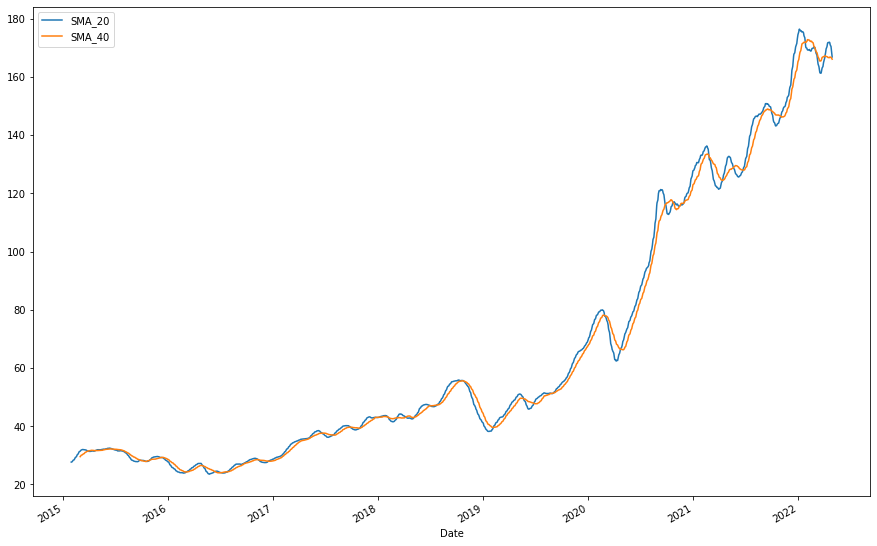

In [7]:
n1,n2=20,40

ndata = data.copy()

ndata[f'SMA_{n1}'] = ndata.Close.rolling(n1).mean()
ndata[f'SMA_{n2}'] = ndata.Close.rolling(n2).mean()

ndata[[f'SMA_{n1}', f'SMA_{n2}']].plot(figsize=(15,10))

We can see that SMA_20 and SMA_40 are crossing over each other in multiple times. But the plot looks little huge so lets take data of last 200 days only.

<AxesSubplot:xlabel='Date'>

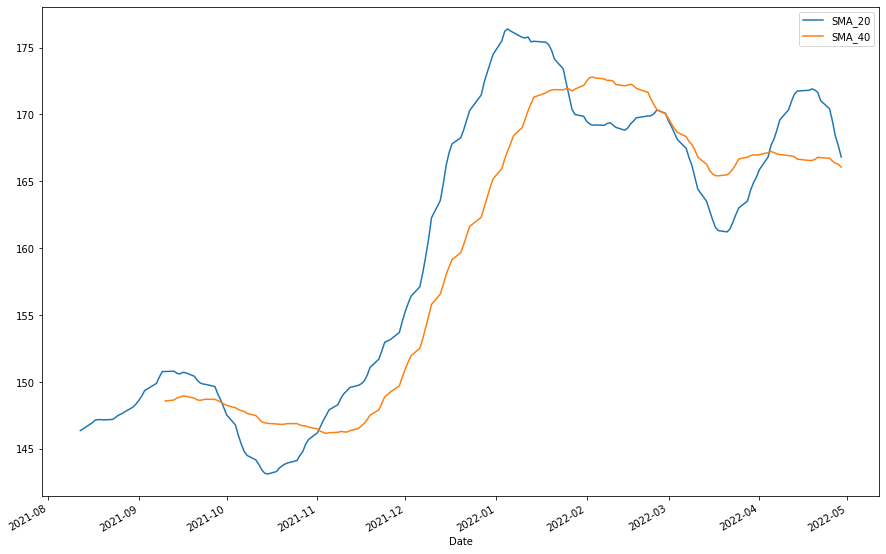

In [8]:
last = 200
n1,n2=20,40

tdata = data.copy().tail(last)

tdata[f'SMA_{n1}'] = tdata.Close.rolling(n1).mean()
tdata[f'SMA_{n2}'] = tdata.Close.rolling(n2).mean()

tdata[[f'SMA_{n1}', f'SMA_{n2}']].plot(figsize=(15,10))

## Our Simple Strategy

Now lets make our strategy. If the short SMA crosses over large SMA, we buy and hold positions because we saw that it has increased the value of price recently and could increase in future too. But if short SMA corsses below large SMA, we sell our holding positions because there has been recent price drops. In above example we will do trades whenever crossover happens. A simple way to find a crossover is by comparing difference between current price and previous. If the difference was positive in past and negative now then we do trade and vice versa. Note that we buy on the Open price of next day.

In [9]:
tdata['sma1_gt_sma2'] = tdata[f'SMA_{n1}']>tdata[f'SMA_{n2}']
tdata['crossed'] = (tdata.sma1_gt_sma2!=tdata.sma1_gt_sma2.shift(1))
print(f"Num Corssed: {tdata.crossed.sum()-1}")
tdata


Num Corssed: 7


,Open,High,Low,Close,SMA_20,SMA_40,sma1_gt_sma2,crossed
Date,,,,,,,,
2021-07-16,148.460007,149.759995,145.880005,146.389999,NaN,NaN,False,True
2021-07-19,143.750000,144.070007,141.669998,142.449997,NaN,NaN,False,False
2021-07-20,143.460007,147.100006,142.960007,146.149994,NaN,NaN,False,False
2021-07-21,145.529999,146.130005,144.630005,145.399994,NaN,NaN,False,False
2021-07-22,145.940002,148.199997,145.809998,146.800003,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...
2022-04-25,161.119995,163.169998,158.460007,162.880005,170.435000,166.72550,True,False
2022-04-26,162.250000,162.339996,156.720001,156.800003,169.495000,166.51750,True,False
2022-04-27,155.910004,159.789993,155.380005,156.570007,168.375500,166.35175,True,False


In above code, we made new column where we checked if SMA1 is higher than SMA2 or not and in next crossed column we checked if the status of SMA1>SMA2 still holds same from the previous time. And when it is false, we do trade. We should ignore the first one because it will give us NaN value on shift. Let's assume that we have USD 10000 in cash and want to do trade. Since we have SMA1>SMA2 column, we buy only when there is `crossed` True and `sma1_gt_sma2` True as well. And we sell only when there is `crossed` True and `sma1_gt_sma2` is False.

### Trading Result
To find trades data, we loop through the data and if yesterday's SMA1>SMA2 then we buy on today's Open price and selling happens on same way.

* If crossed and SMA1>SMA2: buy positions based on remaining amount and add positions.
* If crossed and SMA1<SMA2: sell available positions and add remaining amount.
* On last day sell all positions and add remaining amount.

In [10]:
ntdata = tdata.reset_index().copy()
ntdata['crossed']=ntdata.crossed.shift(1)
ntdata['sma1_gt_sma2']=ntdata.sma1_gt_sma2.shift(1)

positions = 0
rem_amt=10000
lr = len(ntdata)-1
trades = []
tinfo=[]

for i, row in ntdata.iterrows():
    if i!=0:
        if row.crossed and row.sma1_gt_sma2:
            positions=int(rem_amt/row.Open)
            rem_amt= rem_amt-row.Open*positions
            tinfo.append(positions)
            tinfo.append(row.Open)
            tinfo.append(row.Date)
            
        if row.crossed==True and row.sma1_gt_sma2==False and positions>0:
            rem_amt = rem_amt+row.Open*positions
            tinfo.append(row.Date)
            tinfo.append(row.Open)
            trades.append(tinfo)
            tinfo=[]
            positions = 0
    
    if i==lr and positions>0:
        rem_amt=rem_amt + positions*row.Open
        
        tinfo.append(row.Date)
        tinfo.append(row.Open)
        trades.append(tinfo)
        
        positions = 0
        ntdata.loc[i, 'positions'] = positions
        ntdata.loc[i, 'rem_amount'] = rem_amt

    
trades = pd.DataFrame(trades, columns=['Positions', 'Buy', 'Entry', 'Exit', 'Sell'])
trades['return']=((trades['Sell']-trades['Buy'])*trades.Positions).cumsum()

trades

,Positions,Buy,Entry,Exit,Sell,return
0,66,150.630005,2021-09-13,2021-10-01,141.899994,-576.180725
1,62,150.389999,2021-11-03,2022-01-27,162.449997,171.539124
2,61,164.699997,2022-03-01,2022-03-02,164.389999,152.629272
3,58,172.360001,2022-04-06,2022-04-29,161.839996,-457.530975


Looking over the above table, in return column, we are in 457 loss overall. What if we did this testing with larger period of data?

## Our Strategy in a Larger Period

Lets start from the last 1000 day and forth.

In [11]:
n1,n2=20,40
last = 1000

tdata = data.copy().tail(last)

tdata[f'SMA_{n1}'] = tdata.Close.rolling(n1).mean()
tdata[f'SMA_{n2}'] = tdata.Close.rolling(n2).mean()

tdata['sma1_gt_sma2'] = tdata[f'SMA_{n1}']>tdata[f'SMA_{n2}']
tdata['crossed'] = (tdata.sma1_gt_sma2!=tdata.sma1_gt_sma2.shift(1))
print(f"Num Corssed: {tdata.crossed.sum()-1}")

ntdata = tdata.reset_index().copy()
ntdata['crossed']=ntdata.crossed.shift(1)
ntdata['sma1_gt_sma2']=ntdata.sma1_gt_sma2.shift(1)

positions = 0
rem_amt=10000
lr = len(ntdata)-1
trades = []
tinfo=[]

for i, row in ntdata.iterrows():
    if i!=0:
        if row.crossed and row.sma1_gt_sma2:
            positions=int(rem_amt/row.Open)
            rem_amt= rem_amt-row.Open*positions
            tinfo.append(positions)
            tinfo.append(row.Open)
            tinfo.append(row.Date)
            
        if row.crossed==True and row.sma1_gt_sma2==False and positions>0:
            rem_amt = rem_amt+row.Open*positions
            tinfo.append(row.Date)
            tinfo.append(row.Open)
            trades.append(tinfo)
            tinfo=[]
            positions = 0
    
    if i==lr and positions>0:
        rem_amt=rem_amt + positions*row.Open
        
        tinfo.append(row.Date)
        tinfo.append(row.Open)
        trades.append(tinfo)
        
        positions = 0
        ntdata.loc[i, 'positions'] = positions
        ntdata.loc[i, 'rem_amount'] = rem_amt

    
trades = pd.DataFrame(trades, columns=['Positions', 'Buy', 'Entry', 'Exit', 'Sell'])
trades['return']=((trades['Sell']-trades['Buy'])*trades.Positions).cumsum()

trades

Num Corssed: 23


,Positions,Buy,Entry,Exit,Sell,return
0,205,48.652500,2018-07-26,2018-10-26,53.974998,1091.112156
1,257,43.099998,2019-02-07,2019-05-23,44.950001,1566.562744
2,232,49.669998,2019-06-28,2019-08-28,51.025002,1880.923523
3,228,52.097500,2019-09-04,2020-03-02,70.570000,6092.653488
4,232,69.300003,2020-04-24,2020-09-29,114.550003,16590.653488
5,233,114.010002,2020-10-26,2020-11-18,118.610001,17662.453133
6,228,121.010002,2020-12-01,2021-02-26,122.589996,18022.691811
7,207,134.940002,2021-04-14,2021-05-24,126.010002,16174.181747
8,194,134.449997,2021-06-24,2021-10-01,141.899994,17619.481155
9,183,150.389999,2021-11-03,2022-01-27,162.449997,19826.460709


It looks like we actually made some money while testing on larger period.

## Strategy with Backtesting
Until now we designed a very simple strategy and did trading and to do so, we had to write too many codes but why do we need to struggle that hard while there is already one open source package available which handles our struggles? Following is a modified version of our strategy and it is modified from the [Quick Start page](https://kernc.github.io/backtesting.py/doc/examples/Quick%20Start%20User%20Guide.html).

In [12]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

class SmaCross(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 20
    n2 = 40
    
    def init(self):
        # Precompute the two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, close any existing
        # short trades, and buy the asset
        if crossover(self.sma1, self.sma2):
            self.position.close()
            self.buy()

        # Else, if sma1 crosses below sma2, close any existing
        # long trades, and sell the asset
        elif crossover(self.sma2, self.sma1):
            self.position.close()
            self.sell()
            


In [137]:
from backtesting import Backtest

bt = Backtest(data.tail(last), SmaCross, cash=10000, commission=0)
stats = bt.run()
stats

Start                     2018-05-11 00:00:00
End                       2022-04-29 00:00:00
Duration                   1449 days 00:00:00
Exposure Time [%]                        94.8
Equity Final [$]                 21836.199413
Equity Peak [$]                  34464.403912
Return [%]                         118.361994
Buy & Hold Return [%]              234.376153
Return (Ann.) [%]                   21.751022
Volatility (Ann.) [%]               38.394298
Sharpe Ratio                         0.566517
Sortino Ratio                        1.031964
Calmar Ratio                         0.562183
Max. Drawdown [%]                  -38.690305
Avg. Drawdown [%]                   -5.507696
Max. Drawdown Duration      458 days 00:00:00
Avg. Drawdown Duration       34 days 00:00:00
# Trades                                   23
Win Rate [%]                        52.173913
Best Trade [%]                      65.295812
Worst Trade [%]                     -10.50055
Avg. Trade [%]                    

We start by importing necessary classes and methods. We create a new class for our own strategy which inherits Strategy. We initialize variables and then SMA.  When doing `run()`,  the `next()` method loops through the data rows and perform checks inside it. We can pass commission percent to calculate how much commission do we have to pay to our broker.

### Trades
The trades table using backtesting is different than ours.

In [14]:
stats['_trades']  # Contains individual trade data

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,205,52,117,48.652500,53.974998,1091.112156,0.109398,2018-07-26,2018-10-26,92 days
1,-205,117,186,53.974998,43.099998,2229.375000,0.201482,2018-10-26,2019-02-07,104 days
2,309,186,259,43.099998,44.950001,571.650707,0.042923,2019-02-07,2019-05-23,105 days
3,-309,259,284,44.950001,49.669998,-1458.479198,-0.105006,2019-05-23,2019-06-28,36 days
4,250,284,326,49.669998,51.025002,338.750839,0.027280,2019-06-28,2019-08-28,61 days
5,-250,326,330,51.025002,52.097500,-268.124580,-0.021019,2019-08-28,2019-09-04,7 days
6,240,330,453,52.097500,70.570000,4433.399963,0.354576,2019-09-04,2020-03-02,180 days
7,-240,453,491,70.570000,69.300003,304.799194,0.017996,2020-03-02,2020-04-24,53 days
8,248,491,600,69.300003,114.550003,11222.000000,0.652958,2020-04-24,2020-09-29,158 days
9,-248,600,619,114.550003,114.010002,133.920227,0.004714,2020-09-29,2020-10-26,27 days


### Plotting

We can even plot our trading with bokeh plot. It is interactive just like plotly

In [16]:
bt.plot()

Row(id='1393', ...)

### Stop Profit and Stop Loss
Profit and stop loss are often used to stay in the safe side. We exit from the trade when there is increase in price and take a profit but reversely, we exit from the trade when there is decrease in price and realize loss.

In [142]:
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting.test import SMA

class SmaCross(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 20
    n2 = 40
    
    def init(self):
        # Precompute the two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, close any existing
        # short trades, and buy the asset
        if crossover(self.sma1, self.sma2):
#             self.position.close()
            self.buy(tp=self.data.Close[-1]*1.2, sl=self.data.Close[-1]*0.95)

        # Else, if sma1 crosses below sma2, close any existing
        # long trades, and sell the asset
        elif crossover(self.sma2, self.sma1):
            self.position.close()
#             self.sell()
            

from backtesting import Backtest

bt = Backtest(data.tail(last), SmaCross, cash=10000, commission=0)
stats = bt.run()
stats         

Start                     2018-05-11 00:00:00
End                       2022-04-29 00:00:00
Duration                   1449 days 00:00:00
Exposure Time [%]                        39.7
Equity Final [$]                 25715.433767
Equity Peak [$]                  26697.815822
Return [%]                         157.154338
Buy & Hold Return [%]              234.376153
Return (Ann.) [%]                   26.872895
Volatility (Ann.) [%]               19.883748
Sharpe Ratio                         1.351501
Sortino Ratio                        2.733988
Calmar Ratio                         2.457561
Max. Drawdown [%]                  -10.934783
Avg. Drawdown [%]                   -2.628023
Max. Drawdown Duration      163 days 00:00:00
Avg. Drawdown Duration       20 days 00:00:00
# Trades                                   12
Win Rate [%]                        66.666667
Best Trade [%]                      21.740146
Worst Trade [%]                     -5.359055
Avg. Trade [%]                    

In above example, we exit the trade once price increases by 20% or decreases by 5%. Doing so we made some profit as well.

## Our Own Strategy in Backtesting

Lets make our own strategy here and implement it on backtesting.
I want to do something like below:
* If EMA 9 > EMA 20 or EMA 50 > EMA 100 then buy.
* If EMA 9 < EMA 20 or EMA 50 < EMA 100 then close positions.

For calculation of EMA, we can use `pandas_ta`. We can install it like `pip install pandas-ta`.


In [143]:
import pandas_ta as ta

from backtesting import Backtest
from backtesting import Strategy
from backtesting.lib import crossover

class EmaCross(Strategy):
    def init(self):
        self.ema9 = self.I(ta.ema, pd.Series(self.data.Close), 9)
        self.ema20 = self.I(ta.ema, pd.Series(self.data.Close), 20)
        self.ema50 = self.I(ta.ema, pd.Series(self.data.Close), 50)
        self.ema100 = self.I(ta.ema, pd.Series(self.data.Close), 100)
    
    def next(self):
        if crossover(self.ema9, self.ema20) or crossover(self.ema50, self.ema100):
            self.buy()

        elif crossover(self.ema20, self.ema9) or crossover(self.ema100, self.ema50):
            self.position.close()
            # self.sell()
    
            
bt = Backtest(data, EmaCross, cash=10000, commission=0.02)
stats = bt.run()
bt.plot()
stats

Start                     2015-01-02 00:00:00
End                       2022-04-29 00:00:00
Duration                   2674 days 00:00:00
Exposure Time [%]                   63.631436
Equity Final [$]                 24777.296183
Equity Peak [$]                  30443.052752
Return [%]                         147.772962
Buy & Hold Return [%]              476.785846
Return (Ann.) [%]                   13.193633
Volatility (Ann.) [%]                21.81465
Sharpe Ratio                         0.604806
Sortino Ratio                         1.02413
Calmar Ratio                         0.463525
Max. Drawdown [%]                  -28.463721
Avg. Drawdown [%]                   -4.544362
Max. Drawdown Duration      776 days 00:00:00
Avg. Drawdown Duration       53 days 00:00:00
# Trades                                   30
Win Rate [%]                        46.666667
Best Trade [%]                      60.672271
Worst Trade [%]                      -7.85946
Avg. Trade [%]                    

Looks like we made some money. But this is just another bad strategy we tested.

### Testing Percentage Price Oscillator
Following is taken from my another [blog](https://q-viper.github.io/2022/03/20/python-for-stock-market-analysis-technical-indicators/). 
* This is a momentum indicator (determines the strength or weakness of a value). But we can view the volatility too.
* Two EMAs, 26 period and 12 periods are used to calculate PPO.
* It contains 2 lines, PPO line and signal line. Signal line is an EMA of the 9 Period PPO, so it moves slower than PPO.
* When PPO line crosses the signal line, it is the time for rise/fall of the price or stock.
* When PPO line crosses over the signal line from below, then it is a buy signal. Reversely, it is a sell signal when PPO line crosses belo the signal line from above.
* When PPO line is below the 0, the short term average is below the longer-term average average, which helps indicate a fall of price.
* Conversely, when PPO line is above 0, the short term average is above the long term average, which helps indicate rise of price.

`pandas_ta` has PPO too so we do not have to write our own code for it.


In [126]:
ta.ppo(data.Close)

,PPO_12_26_9,PPOh_12_26_9,PPOs_12_26_9
2015-01-02,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN
...,...,...,...
2022-04-25,-1.987252,-2.241286,0.254034
2022-04-26,-2.580172,-2.267365,-0.312807
2022-04-27,-3.049812,-2.189604,-0.860208
2022-04-28,-3.039588,-1.743504,-1.296084


In [148]:
class PPO(Strategy):
    def init(self):
        self.ppo = self.I(ta.ppo, pd.Series(self.data.Close))
        
    def next(self):
        if crossover(self.ppo[0], self.ppo[2]):
        # if crossover(self.ppo[1], 0):
            # self.position.close()
            self.buy()

        elif crossover(self.ppo[2], self.ppo[0]):
        #if crossover(0,self.ppo[1]):
            self.position.close()
            # self.sell()
            
bt = Backtest(data, PPO, cash=10000, commission=0.02)
stats = bt.run()
bt.plot()
print(stats)



Start                     2015-01-02 00:00:00
End                       2022-04-29 00:00:00
Duration                   2674 days 00:00:00
Exposure Time [%]                    51.00271
Equity Final [$]                 12163.349445
Equity Peak [$]                  14453.298656
Return [%]                          21.633494
Buy & Hold Return [%]              476.785846
Return (Ann.) [%]                    2.711015
Volatility (Ann.) [%]                18.61385
Sharpe Ratio                         0.145645
Sortino Ratio                         0.22052
Calmar Ratio                         0.067051
Max. Drawdown [%]                  -40.432272
Avg. Drawdown [%]                   -7.414292
Max. Drawdown Duration     1942 days 00:00:00
Avg. Drawdown Duration      169 days 00:00:00
# Trades                                   56
Win Rate [%]                        44.642857
Best Trade [%]                      17.890366
Worst Trade [%]                    -15.387924
Avg. Trade [%]                    

Looks like we again made some money. There is not a golden rule that will make a money, its kind of hit and trial.

### PPO on BABA

In [149]:

bdata = yf.download("BABA", start="2015-01-01", end="2022-11-30")
del bdata['Adj Close']
del bdata['Volume']

bt = Backtest(bdata, PPO, cash=10000, commission=0.02)
stats = bt.run()
bt.plot()
print(stats)


[*********************100%***********************]  1 of 1 completed


Start                     2015-01-02 00:00:00
End                       2022-11-18 00:00:00
Duration                   2877 days 00:00:00
Exposure Time [%]                   52.265861
Equity Final [$]                  1485.461341
Equity Peak [$]                  11330.885306
Return [%]                         -85.145387
Buy & Hold Return [%]              -22.316598
Return (Ann.) [%]                  -21.491087
Volatility (Ann.) [%]               21.490062
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -88.917088
Avg. Drawdown [%]                  -28.010671
Max. Drawdown Duration     2571 days 00:00:00
Avg. Drawdown Duration      705 days 00:00:00
# Trades                                   71
Win Rate [%]                        26.760563
Best Trade [%]                      26.501533
Worst Trade [%]                    -22.092189
Avg. Trade [%]                    

In first PPO strategy, we tested with AAPL and in second we tested with BABA. In BABA, we lost money but in AAPL we made some.

There are many features and strategy to try on using Backtesting.py and those will be covered in next part. Thank you :)